**Customer Personality Prediction - Exploratory Data Analysis (EDA)**

The dataset is downloaded from:
https://github.com/entbappy/Branching-tutorial/blob/master/marketing_campaign.zip

**Table of Contents :-**

1. Import Libraries & Load Data

2. Data Overview

3. Data Cleaning

4. Univariate Analysis

5. Bivariate Analysis

6. Outlier Detection

7. Correlation Analysis

8. Key Findings & Business Insights

### **What is Customer personality analysis and segmentation?**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## 1. Import Libraries & Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

We will set the pandas.set_option to display 100 rows or columns. By default it is 60


In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

Load dataset

In [7]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. Data Overview

Shape and basic info


In [5]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsP

Summary stats

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Check for missing values

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Observations:**

- Columns like Income may have missing values.

- Dt_Customer is likely a date — we'll convert it.

- The dataset includes customer purchases in various product categories.



## 3.  Data Cleaning

Drop nulls or impute

In [31]:
df = df.dropna()

Convert date column

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Feature Engineering

Convert [ Dt_Customer ] to datetime

Create new features:

* Age = Current Year - Year_Birth

* Total_Spending = sum of all product spends

* Customer_Tenure = Current Year - Dt_Customer year

In [20]:
df['Age'] = datetime.now().year - df['Year_Birth']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Customer_Duration'] = datetime.now().year - df['Dt_Customer'].dt.year

Drop ID columns for anonymity and modeling

In [21]:
df.drop(['ID', 'Year_Birth'], axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Predicted_Response,Age,Total_Spending,Customer_Duration
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,0,0,0,3,11,1,1,68,1617,13
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,0,3,11,0,0,71,27,11
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,3,11,0,0,60,776,12
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,0,3,11,0,0,41,53,11
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,3,11,0,0,44,422,11


Save CSV for Power BI

In [8]:
df.to_csv("exports/df_cleaned.csv", index=False)

## 4. Univariate Analysis

Age Distribution

Text(0.5, 1.0, 'Customer Age Distribution')

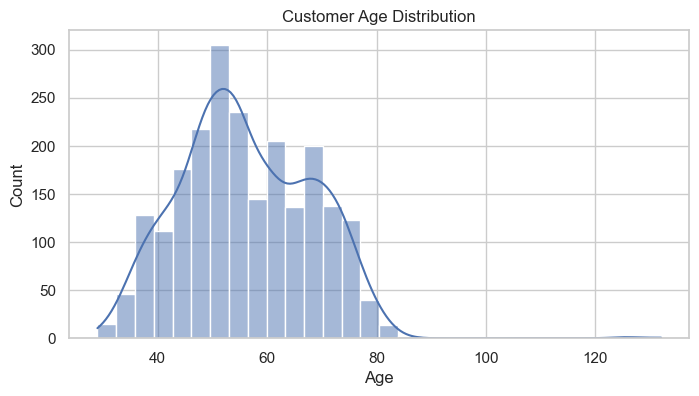

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Customer Age Distribution")

Income Distribution

Text(0.5, 1.0, 'Income Distribution')

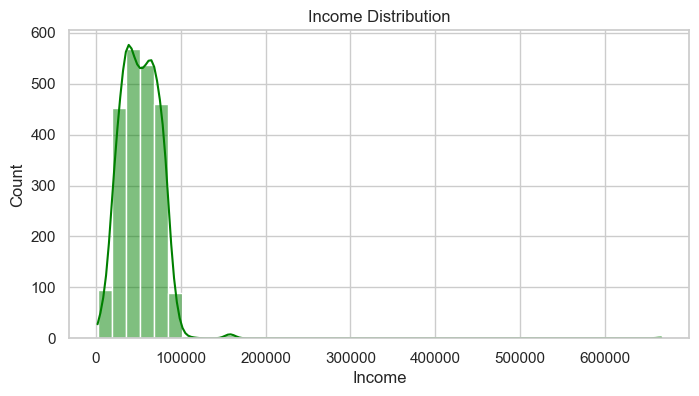

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], bins=40, kde=True, color='green')
plt.title("Income Distribution")

Total Spending Distribution

Text(0.5, 1.0, 'Total Customer Spending Distribution')

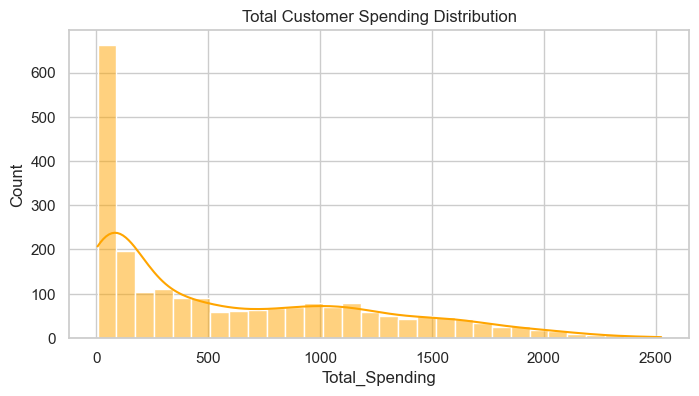

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Total_Spending'], bins=30, kde=True, color='orange')
plt.title("Total Customer Spending Distribution")

## 5. Bivariate Analysis

Income vs Education

Text(0.5, 1.0, 'Income by Education Level')

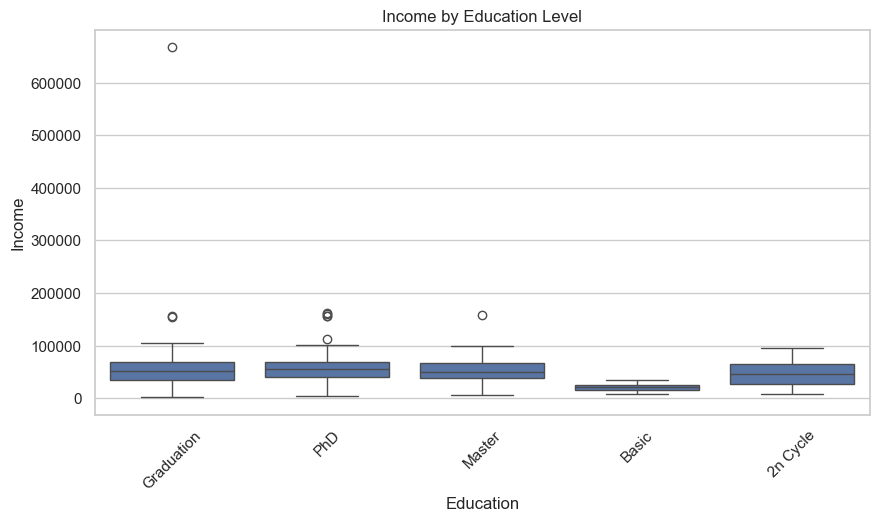

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")


Total Spending by Marital Status

Text(0.5, 1.0, 'Total Spending vs Marital Status')

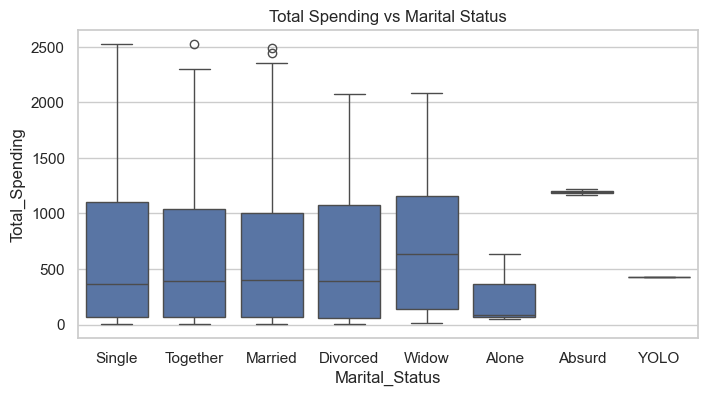

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.title("Total Spending vs Marital Status")


Spending Patterns by Age Group

Text(0, 0.5, 'Average Amount Spent')

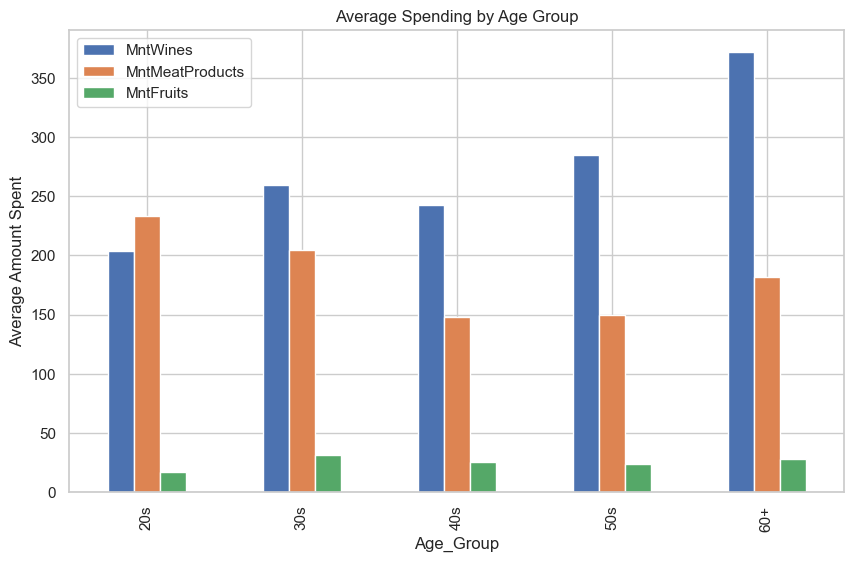

In [27]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20s','30s','40s','50s','60+'])
spend_cols = ['MntWines', 'MntMeatProducts', 'MntFruits']  #Mnt means Mount/Mountain

df_grouped = df.groupby('Age_Group')[spend_cols].mean()
df_grouped.plot(kind='bar', figsize=(10,6))
plt.title("Average Spending by Age Group")
plt.ylabel("Average Amount Spent")


## 6. Outlier Detection

Text(0.5, 1.0, 'Outlier Check - Income & Spending')

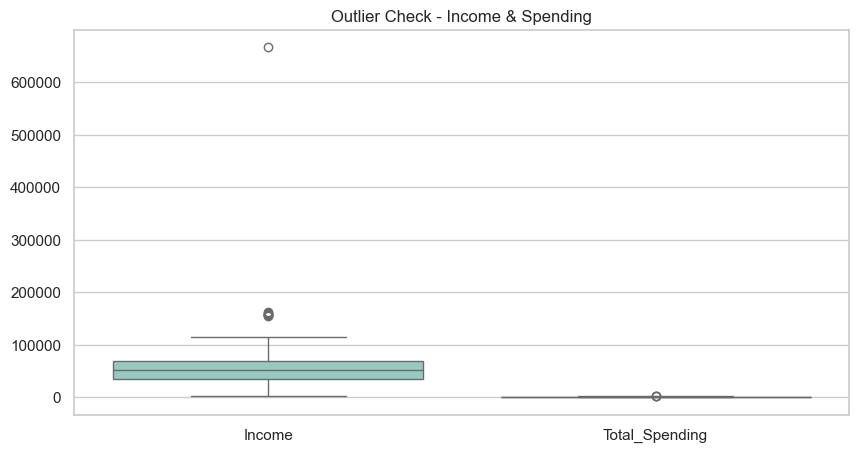

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Income', 'Total_Spending']], palette='Set3')
plt.title("Outlier Check - Income & Spending")

We may consider treating outliers using:

- Winsorizing

- Log Transform

- IQR Filtering

## 7. Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

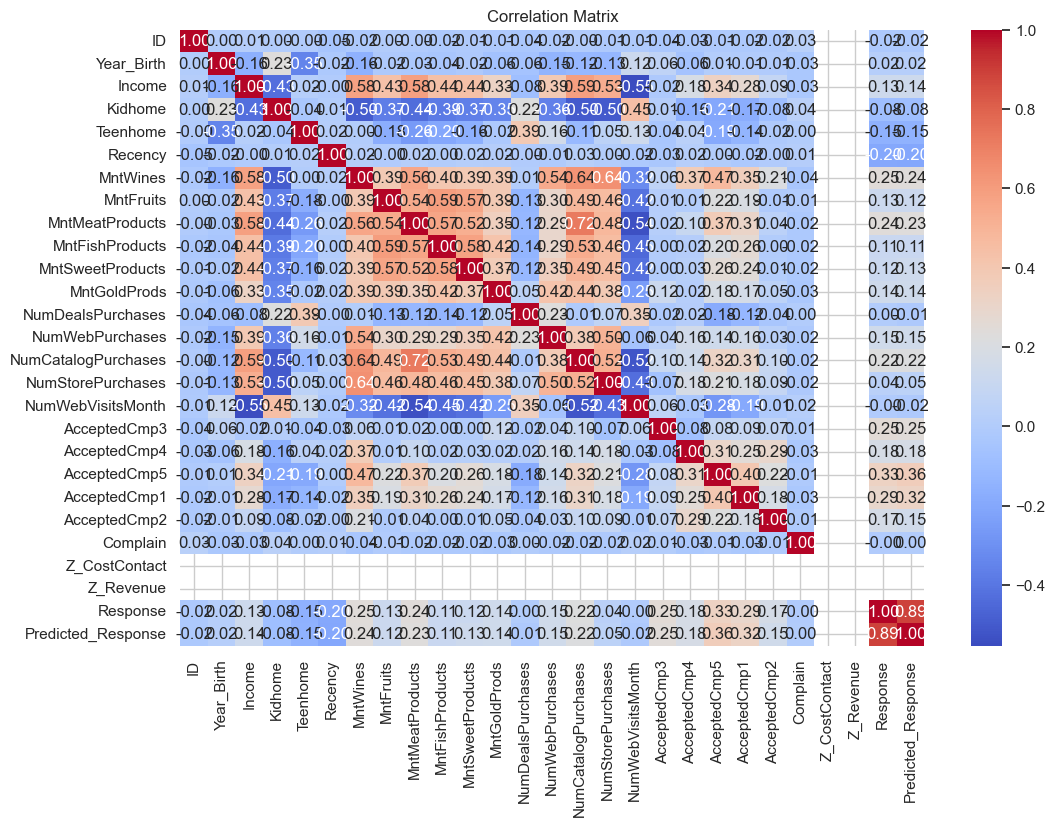

In [15]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

Highlights:

- Spending categories tend to correlate with each other.

- Income correlates moderately with total spending.

- Age has a weak negative correlation with spending.

## 8. Clustering (KMeans)

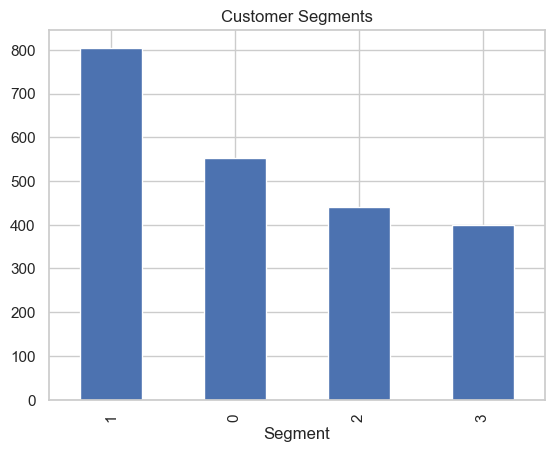

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = df[['Age', 'Income', 'Total_Spending']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

df['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments")
plt.show()

df.to_csv("exports/df_with_segments.csv", index=False)


## 9. Classification (Marketing Response Prediction)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = df.drop([ 'Dt_Customer', 'Response'], axis=1)
features = pd.get_dummies(features, drop_first=True)
target = df['Response']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       379
           1       0.62      0.26      0.37        69

    accuracy                           0.86       448
   macro avg       0.75      0.62      0.64       448
weighted avg       0.84      0.86      0.84       448



Save predictions

In [12]:
df['Predicted_Response'] = model.predict(features)
df.to_csv("exports/df_model_predictions.csv", index=False)

Feature importance

In [13]:
feat_imp = pd.DataFrame({'Feature': features.columns, 'Importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
feat_imp.to_csv("exports/feature_importance.csv", index=False)

## 10. Power BI Integration

Exported CSVs:

- df_cleaned.csv: for EDA

- df_with_segments.csv: for clustering

- df_model_predictions.csv: classification results

- feature_importance.csv: ML model insights

In Power BI:

- Customer Overview: Age, Income, Tenure

- Spending Trends: Total, Category-wise

- Segments: Cluster-wise behavior

- Model Dashboard: Prediction vs Actual, Feature Impact



## 11. Business Insights & Recommendations

Insights:

- High-income, middle-aged customers spend most on wine and meat products.

- Married professionals are top spenders and most responsive to marketing.

- Segment 2 and 3 are ideal targets for premium product offers.

Actions:

- Focus campaigns on Segment 2 (high income, high spending)

- Create personalized bundles by segment preferences

- Offer loyalty rewards to high tenure customers